# Assignment 3

# Text classification with tf*idf features

In [1]:
import sys
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras import backend as K

from app.preprocessing import load_dataset, load_embeddings, preprocess_data


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. lower Case
2. remove numbers

In [2]:
data = load_dataset(load_from_pickle=False)
model_data_tf = preprocess_data(data, 'tags', 'post', input_ins='as_tf_idf', cv_split_full=0.2, cv_split_dev=0.3)

In [3]:
# data_processed = load_dataset(tags_categories='__all__')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())
data[:10]
model_data_tf['y_test'].shape


sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


(8000, 20)

## MLP classifier in Keras using tf*idf features

In [ ]:
from app.preprocessing import preprocess_data, load_dataset
from app.metrics import precision, recall, f1, accuracy

model = Sequential()
model.add(Dense(256, input_dim=model_data_tf['x_train'].shape[1] , activation='relu'))
# Dropout probability in order to avoid overfitting.
model.add(Dropout(0.7))
model.add(Dense(126,  activation='relu'))
model.add(Dropout(0.7))
# Mutual exclusive Classes
model.add(Dense(Nclasses,  activation='softmax'))

print(model.summary())
#Model compilation parameterized with  
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=[precision, recall, f1, accuracy])

checkpoint = ModelCheckpoint('keras_tf_idf_model', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint('keras_tf_idf_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')

history = model.fit(model_data_tf['x_train'], model_data_tf['y_train'],
              batch_size=32,
              epochs=10,
              verbose = 0,
              callbacks=[checkpoint,TQDMNotebookCallback(), checkpoint2],
              validation_data=(model_data_tf['x_train_dev'], model_data_tf['y_train_dev']),
              shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280256   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 126)               32382     
_________________________________________________________________
dropout_2 (Dropout)          (None, 126)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2540      
Total params: 1,315,178
Trainable params: 1,315,178
Non-trainable params: 0
___________


Epoch 00001: val_accuracy improved from -inf to 0.97524, saving model to keras_tf_idf_model

Epoch 00001: val_f1 improved from -inf to 0.68504, saving model to keras_tf_idf_model



Epoch 00002: val_accuracy improved from 0.97524 to 0.98094, saving model to keras_tf_idf_model

Epoch 00002: val_f1 improved from 0.68504 to 0.78147, saving model to keras_tf_idf_model



Epoch 00003: val_accuracy improved from 0.98094 to 0.98257, saving model to keras_tf_idf_model

Epoch 00003: val_f1 improved from 0.78147 to 0.80709, saving model to keras_tf_idf_model



Epoch 00004: val_accuracy improved from 0.98257 to 0.98293, saving model to keras_tf_idf_model

Epoch 00004: val_f1 improved from 0.80709 to 0.81421, saving model to keras_tf_idf_model



Epoch 00005: val_accuracy improved from 0.98293 to 0.98327, saving model to keras_tf_idf_model

Epoch 00005: val_f1 improved from 0.81421 to 0.82025, saving model to keras_tf_idf_model



Epoch 00006: val_accuracy improved from 0.98327 to 0.98338, saving model to keras_tf_idf_model

Epoch 00006: val_f1 improved from 0.82025 to 0.82330, saving model to keras_tf_idf_model


 ### Notes of TF-IDF MLD Text Classification
 
 Based on the parameter tuning of the Model that is used for the text classification we hav

## Visualize Model Training History

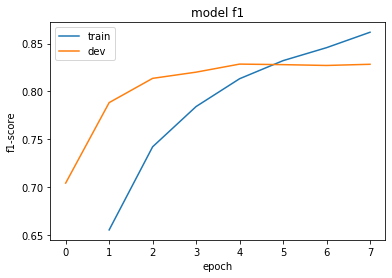

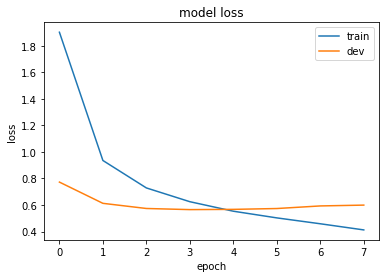

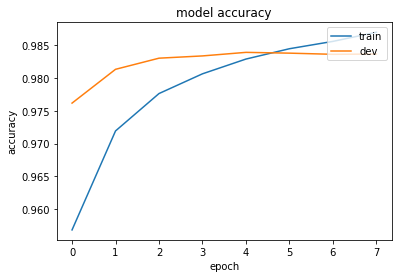

In [16]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=history)

# summarize history for accurracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

## Evaluate performance of tf-idf MLP model

In [17]:
score = model.evaluate(model_data_tf['x_test'], model_data_tf['y_test'], batch_size=32, verbose=1)

print('\nTest precision: %.4f' %  (score[1]))
print('\nTest recall: %.4f' %  (score[2]))
print('\nTest f1: %.4f' % (score[3]))
print('\nTest accuracy: %.4f'% (score[4]))

8000/8000 [==============================] - 1s 73us/step

Test Binary_cross_entropy: 0.5980

Test precision: 0.8586

Test recall: 0.7819

Test f1: 0.8178

Test accuracy: 0.9826


## Visualize Prediction Perfomance of centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 81.27%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      255                        3                  0   
ruby-on-rails              4                      361                  0   
android                    2                        0                388   
angularjs                 32                        4                  1   
asp.net                    2                        0                  1   
c                         42                        6                  0   
c#                         3                        0                  0   
c++                        2                        1                  0   
css                        5                        2                  1   
html                       4        

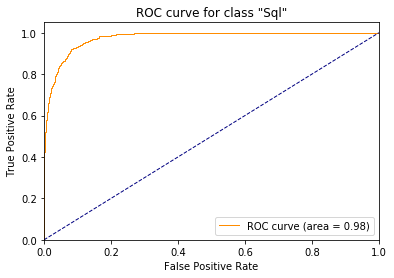

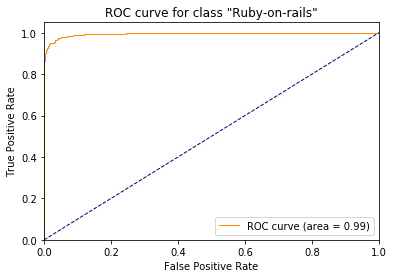

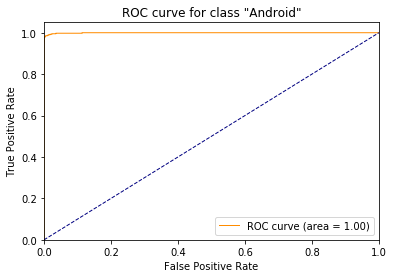

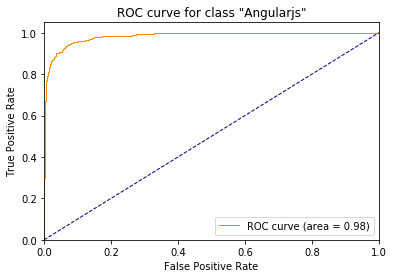

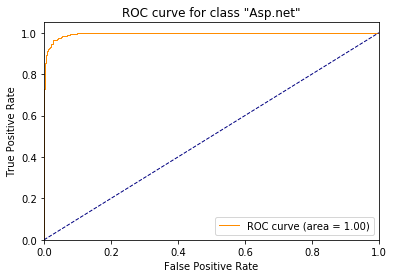

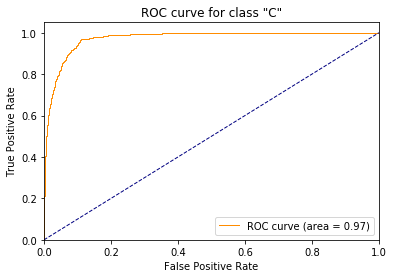

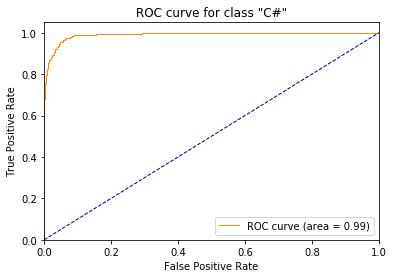

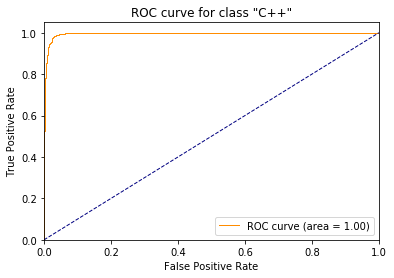

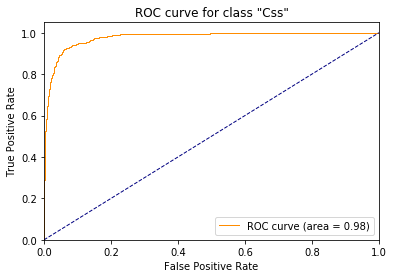

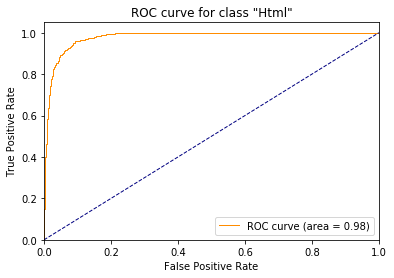

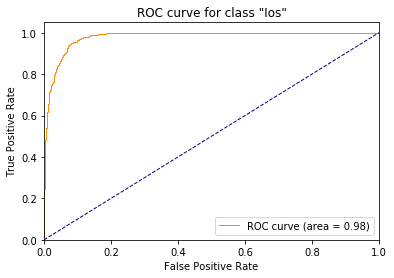

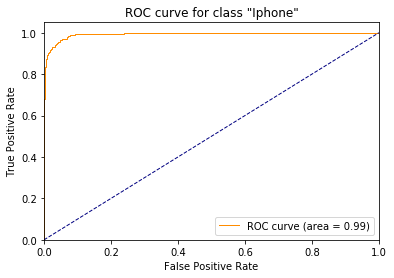

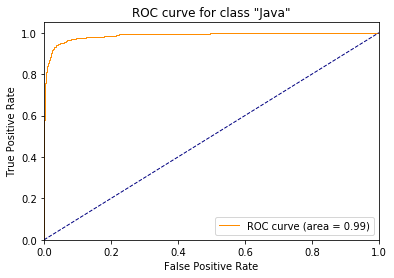

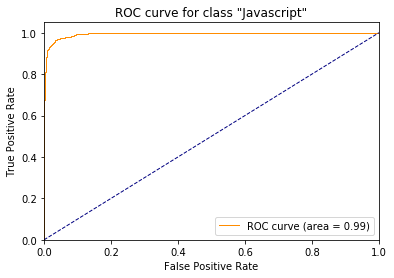

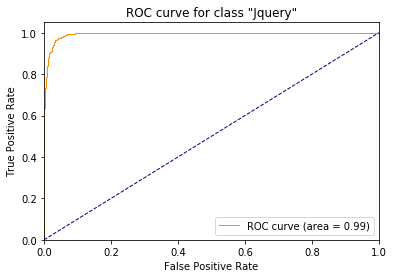

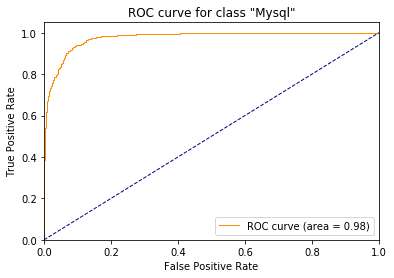

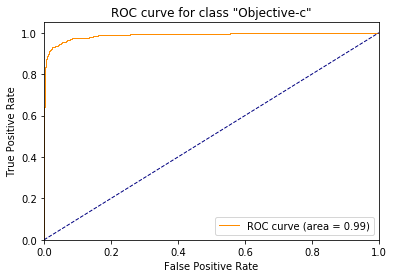

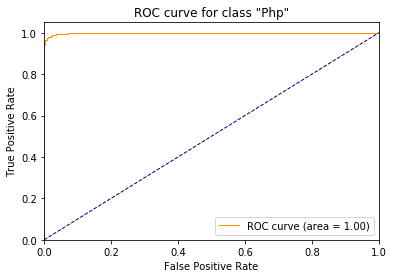

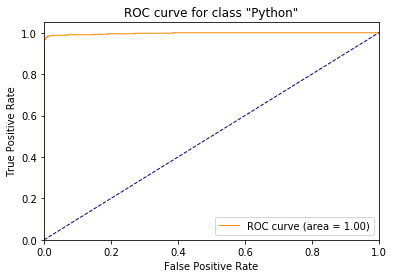

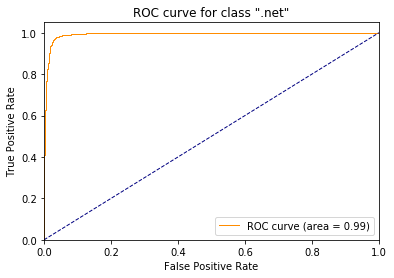

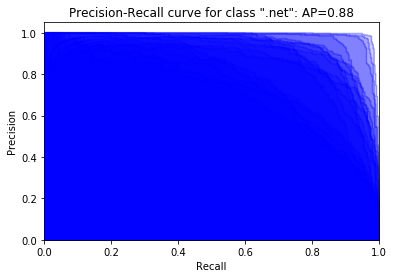

In [19]:
import numpy as np
from app.visualization import plot_prediction_metrics, create_clf_report, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pylab as plt

prediction_val = model.predict(model_data_tf['x_test'], batch_size=32)

# returns each entry result to the classification with the relevant probabilities
y_pred_processed = np.array([np.argmax(val) for val in prediction_val])
y_true_processed = np.array([np.argmax(val) for val in model_data_tf['y_test']])

plot_roc_curve(model_data_tf['y_test'], prediction_val, Classes, 1)

plot_precision_recall_curve(model_data_tf['y_test'], prediction_val, Classes , 1)


In [21]:
confusion = create_clf_report(y_true_processed, y_pred_processed, Classes)


--------------------------------------------------------------------------------
Accuracy Score: 81.27%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      255                        3                  0   
ruby-on-rails              4                      361                  0   
android                    2                        0                388   
angularjs                 32                        4                  1   
asp.net                    2                        0                  1   
c                         42                        6                  0   
c#                         3                        0                  0   
c++                        2                        1                  0   
css                        5                        2                  1   
html                       4        

,predicted_sql,predicted_ruby-on-rails,predicted_android,predicted_angularjs,predicted_asp.net,predicted_c,predicted_c#,predicted_c++,predicted_css,predicted_html,predicted_ios,predicted_iphone,predicted_java,predicted_javascript,predicted_jquery,predicted_mysql,predicted_objective-c,predicted_php,predicted_python,predicted_.net
sql,255,3,0,34,0,77,4,1,3,1,3,6,3,0,0,1,3,3,0,3
ruby-on-rails,4,361,0,0,1,0,0,2,1,9,6,9,1,0,1,2,1,1,1,0
android,2,0,388,0,1,0,0,1,1,0,1,0,4,1,0,0,1,0,0,0
angularjs,32,4,1,302,2,16,0,2,18,0,1,2,5,1,2,0,1,1,3,7
asp.net,2,0,1,0,362,7,19,0,0,0,0,0,2,0,0,1,1,4,1,0
c,42,6,0,13,4,274,11,0,10,0,2,14,7,0,1,2,2,5,0,7
c#,3,0,0,0,41,22,311,1,2,1,1,7,2,0,2,3,1,2,0,1
c++,2,1,0,1,0,0,1,349,38,0,0,0,3,5,0,0,0,0,0,0
css,5,2,1,7,2,2,0,47,285,1,0,2,18,13,0,1,11,0,0,3
html,4,6,0,0,1,3,0,1,5,269,59,2,2,0,1,45,0,1,1,0


In [22]:
confusion

,predicted_sql,predicted_ruby-on-rails,predicted_android,predicted_angularjs,predicted_asp.net,predicted_c,predicted_c#,predicted_c++,predicted_css,predicted_html,predicted_ios,predicted_iphone,predicted_java,predicted_javascript,predicted_jquery,predicted_mysql,predicted_objective-c,predicted_php,predicted_python,predicted_.net
sql,255,3,0,34,0,77,4,1,3,1,3,6,3,0,0,1,3,3,0,3
ruby-on-rails,4,361,0,0,1,0,0,2,1,9,6,9,1,0,1,2,1,1,1,0
android,2,0,388,0,1,0,0,1,1,0,1,0,4,1,0,0,1,0,0,0
angularjs,32,4,1,302,2,16,0,2,18,0,1,2,5,1,2,0,1,1,3,7
asp.net,2,0,1,0,362,7,19,0,0,0,0,0,2,0,0,1,1,4,1,0
c,42,6,0,13,4,274,11,0,10,0,2,14,7,0,1,2,2,5,0,7
c#,3,0,0,0,41,22,311,1,2,1,1,7,2,0,2,3,1,2,0,1
c++,2,1,0,1,0,0,1,349,38,0,0,0,3,5,0,0,0,0,0,0
css,5,2,1,7,2,2,0,47,285,1,0,2,18,13,0,1,11,0,0,3
html,4,6,0,0,1,3,0,1,5,269,59,2,2,0,1,45,0,1,1,0


# Text classification with embedding centroids

### Load Embeddings

In [3]:
embeddings = load_embeddings(data, 'post', minimized=False)

## MLP text classifier in Keras with fasttext centroids

In [7]:
### If 'cc.en.300.bin.gz' is not downloaded then comment out the below lines
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gzip -d cc.en.300.bin.gz

from app.preprocessing import preprocess_data
from app.metrics import precision, recall, f1, accuracy

# model2_data = preprocess_data(data, 'tags', 'post', 'as_centroids',embeddings=embeddings)

model2 = Sequential()
model2.add(Dense(512, input_dim=model2_data['x_train'].shape[1] , activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(256,  activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128,  activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(Nclasses,  activation='softmax'))

print(model2.summary())
model2.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.001),
               metrics=[precision, recall, f1, accuracy])

checkpoint3 = ModelCheckpoint('keras_fastetxt_centroids_model', monitor='val_f1', verbose=1, save_best_only=True, mode='max')

history2 = model2.fit(model2_data['x_train'], model2_data['y_train'],
              batch_size=32,
              epochs=35,
              verbose = 0,
              callbacks=[checkpoint3,TQDMNotebookCallback()],
              validation_data=(model2_data['x_train_dev'], model2_data['y_train_dev']),
              shuffle=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                2580      
Total para


Epoch 00001: val_f1 did not improve from -inf



Epoch 00002: val_f1 did not improve from -inf



Epoch 00003: val_f1 improved from -inf to 0.36544, saving model to keras_fastetxt_centroids_model



Epoch 00004: val_f1 improved from 0.36544 to 0.38687, saving model to keras_fastetxt_centroids_model



Epoch 00005: val_f1 improved from 0.38687 to 0.43072, saving model to keras_fastetxt_centroids_model



Epoch 00006: val_f1 improved from 0.43072 to 0.45228, saving model to keras_fastetxt_centroids_model



Epoch 00007: val_f1 improved from 0.45228 to 0.48503, saving model to keras_fastetxt_centroids_model



Epoch 00008: val_f1 improved from 0.48503 to 0.51890, saving model to keras_fastetxt_centroids_model



Epoch 00009: val_f1 did not improve from 0.51890



Epoch 00010: val_f1 improved from 0.51890 to 0.53137, saving model to keras_fastetxt_centroids_model



Epoch 00011: val_f1 improved from 0.53137 to 0.55421, saving model to keras_fastetxt_centroids_model



Epoch 00012: val_f1 improved from 0.55421 to 0.56690, saving model to keras_fastetxt_centroids_model



Epoch 00013: val_f1 improved from 0.56690 to 0.57189, saving model to keras_fastetxt_centroids_model



Epoch 00014: val_f1 did not improve from 0.57189



Epoch 00015: val_f1 improved from 0.57189 to 0.57530, saving model to keras_fastetxt_centroids_model



Epoch 00016: val_f1 improved from 0.57530 to 0.59548, saving model to keras_fastetxt_centroids_model



Epoch 00017: val_f1 improved from 0.59548 to 0.59677, saving model to keras_fastetxt_centroids_model



Epoch 00018: val_f1 improved from 0.59677 to 0.60733, saving model to keras_fastetxt_centroids_model



Epoch 00019: val_f1 improved from 0.60733 to 0.60943, saving model to keras_fastetxt_centroids_model



Epoch 00020: val_f1 did not improve from 0.60943



Epoch 00021: val_f1 improved from 0.60943 to 0.61372, saving model to keras_fastetxt_centroids_model



Epoch 00022: val_f1 did not improve from 0.61372



Epoch 00023: val_f1 improved from 0.61372 to 0.61649, saving model to keras_fastetxt_centroids_model



Epoch 00024: val_f1 did not improve from 0.61649



Epoch 00025: val_f1 improved from 0.61649 to 0.62125, saving model to keras_fastetxt_centroids_model



Epoch 00026: val_f1 improved from 0.62125 to 0.62553, saving model to keras_fastetxt_centroids_model



Epoch 00027: val_f1 improved from 0.62553 to 0.64187, saving model to keras_fastetxt_centroids_model



Epoch 00028: val_f1 did not improve from 0.64187



Epoch 00029: val_f1 did not improve from 0.64187



Epoch 00030: val_f1 did not improve from 0.64187



Epoch 00031: val_f1 did not improve from 0.64187



Epoch 00032: val_f1 improved from 0.64187 to 0.65339, saving model to keras_fastetxt_centroids_model



Epoch 00033: val_f1 did not improve from 0.65339



Epoch 00034: val_f1 improved from 0.65339 to 0.65351, saving model to keras_fastetxt_centroids_model



Epoch 00035: val_f1 did not improve from 0.65351



284362

 ## Visualize Model Training History

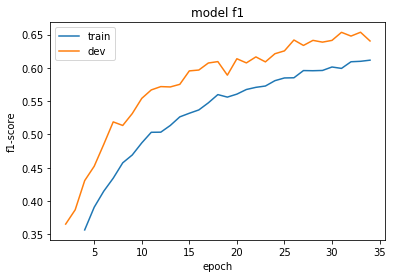

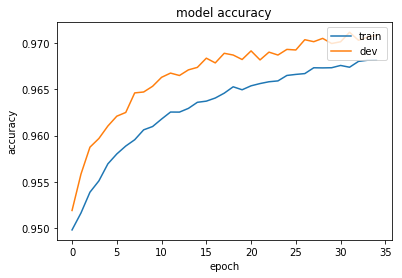

In [8]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(history2)

## Evaluate performance of centroids MLP model

In [10]:
score2 = model2.evaluate(model2_data['x_test'], model2_data['y_test'], batch_size=32, verbose=1)
print('\nTest Binary_cross_entropy: %.4f' %  (score2[0]))
print('\nTest precision: %.4f' %  (score2[1]))
print('\nTest recall: %.4f' %  (score2[2]))
print('\nTest f1: %.4f' % (score2[3]))
print('\nTest accuracy: %.4f'% (score2[4]))

12000/12000 [==============================] - 0s 33us/step

Test Binary_cross_entropy: 0.0958

Test precision: 0.8520

Test recall: 0.3344

Test f1: 0.4758

Test accuracy: 0.9638


## Visualize Prediction Perfomance of centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 58.80%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      297                        8                  5   
ruby-on-rails              5                      306                  4   
android                    2                        8                399   
angularjs                 42                        8                  5   
asp.net                    5                        0                  0   
c                         42                       12                  4   
c#                        21                        2                  0   
c++                        0                        4                  4   
css                        2                        2                  7   
html                       4        

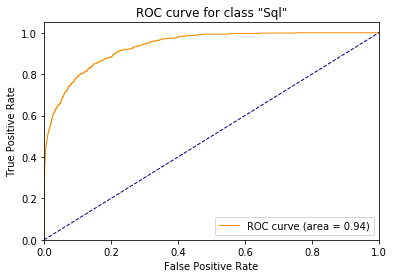

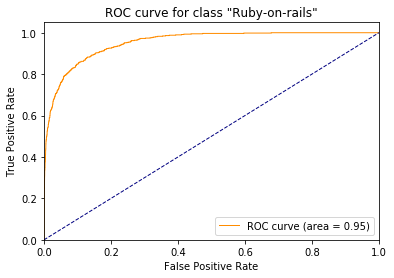

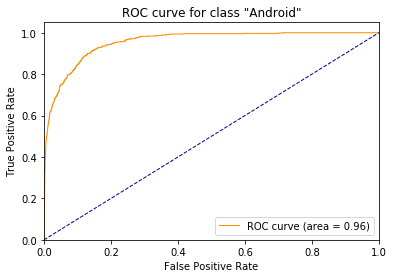

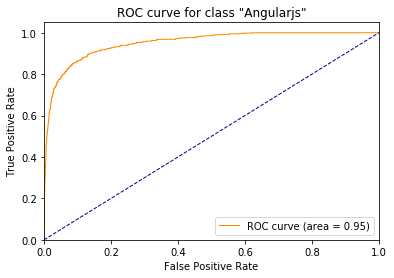

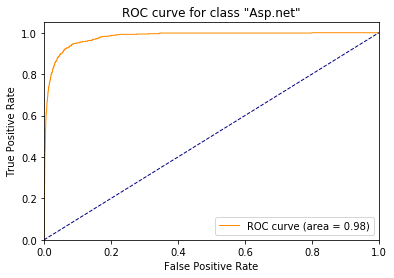

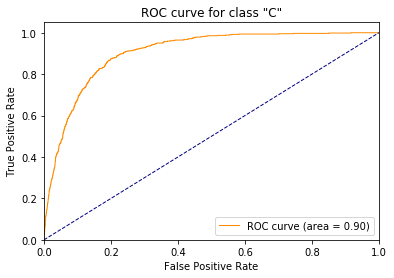

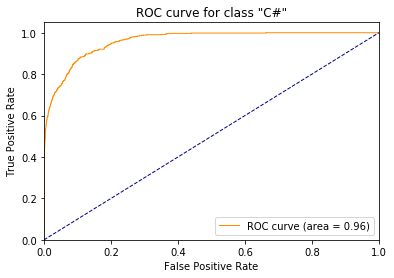

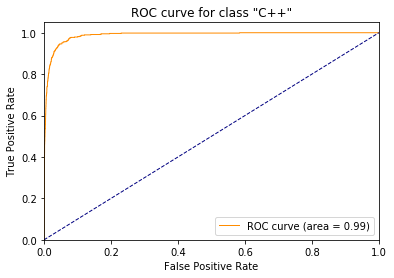

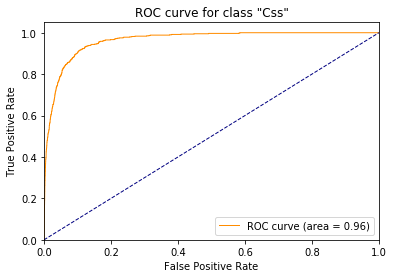

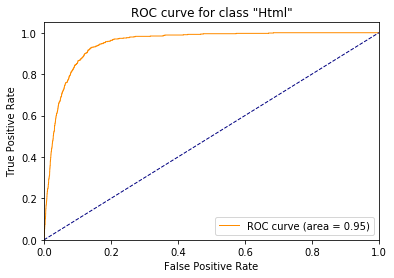

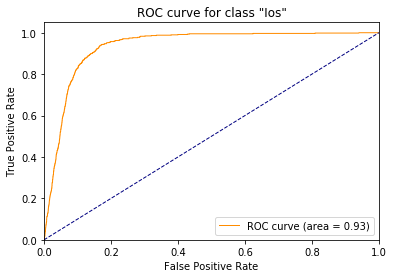

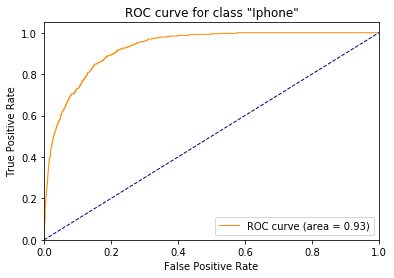

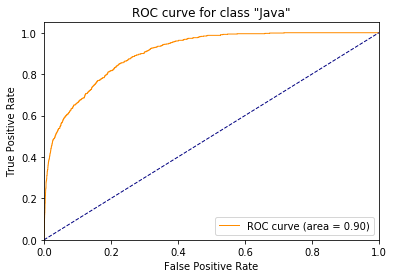

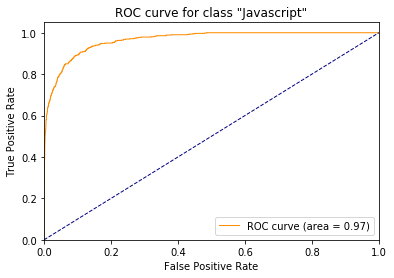

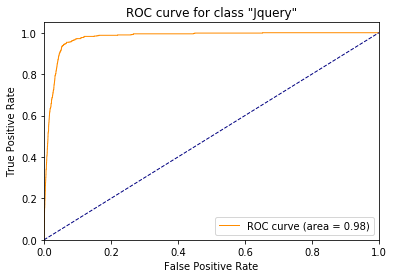

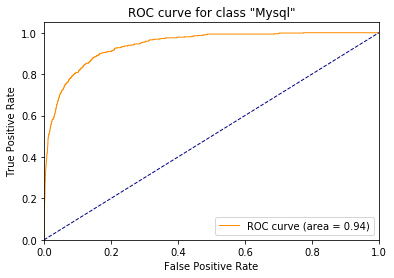

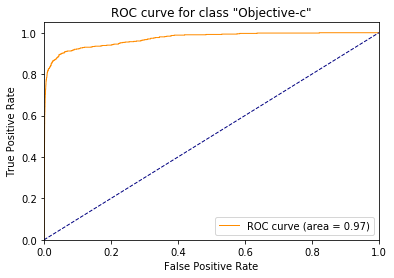

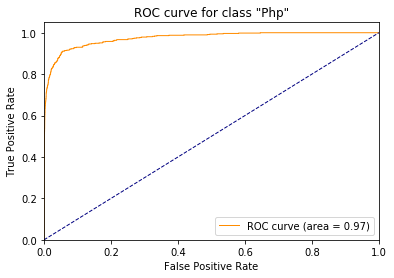

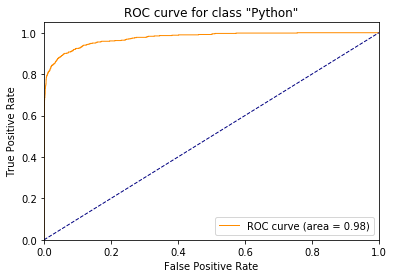

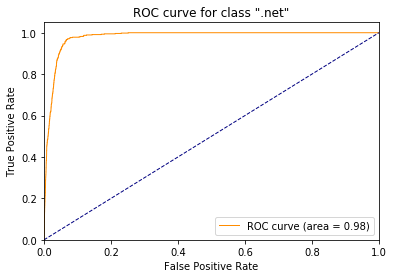

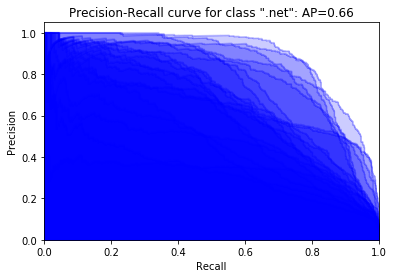

In [13]:
import numpy as np
from app.visualization import plot_prediction_metrics, create_clf_report, plot_roc_curve, plot_precision_recall_curve
prediction_val_2 = model2.predict(model2_data['x_test'], batch_size=32)

# returns each entry result to the classification with the relevant probabilities
y_pred_2_processed = np.array([np.argmax(val) for val in prediction_val_2])
y_true_2_processed = np.array([np.argmax(val) for val in model2_data['y_test']])

create_clf_report(y_true_2_processed, y_pred_2_processed, Classes)

plot_roc_curve(model2_data['y_test'], prediction_val_2, Classes, 1)

plot_precision_recall_curve(model2_data['y_test'], prediction_val_2, Classes , 1)
